In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['font.size']=18

In [3]:
import kid_readout.utils.readoutnc

In [4]:
rnc = kid_readout.utils.readoutnc.ReadoutNetCDF('/data/readout/2015-11-27_223356_mmw_frequency_sweep_streaming_on_responsive_resonances.nc')

In [5]:
ts = rnc.timestreams[0]

In [5]:
f64 = np.zeros((16000,))
f128 = np.zeros((16000,))
f256 = np.zeros((16000,))
for k in range(16000):
    d = ts.get_data_index(k)
    ff = np.abs(np.fft.fft(d))
    f64[k] = ff[64]
    f128[k] = ff[128]
    f256[k] = ff[256]

In [6]:
%timeit np.abs(np.fft.fft(d))

100 loops, best of 3: 3.32 ms per loop


In [6]:
f64 = f64.reshape((-1,32))
f128 = f128.reshape((-1,32))
f256 = f256.reshape((-1,32))


In [6]:
d = ts.data[:]

In [7]:
d.shape

(16000, 65536)

In [7]:
df = np.abs(np.fft.fft(d[30::32,:],axis=1))

In [8]:
df.shape

(500, 65536)

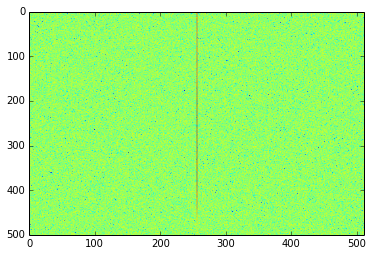

In [9]:
imshow(np.log10(df[:,1:512]),aspect='auto')

(32268, 33268)

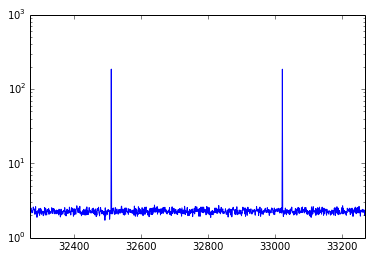

In [52]:
semilogy(np.fft.fftshift(df[:,1:].mean(0)))
xlim(2**15-500,2**15+500)

In [44]:
256/(65536/(256e6/2**13))

122.0703125

In [8]:
d = d.reshape((d.shape[0],-1,256)).mean(1)

In [9]:
d.shape

(16000, 256)

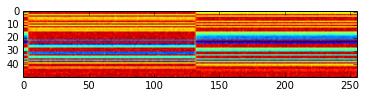

In [56]:
imshow(d[30::32,:].real)

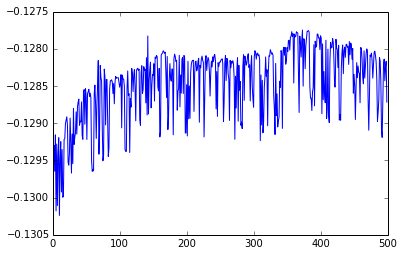

In [18]:
plot(d[29::32,:,:].mean(1).mean(1).real)

In [17]:
dm = d-d.mean(1)[:,None]

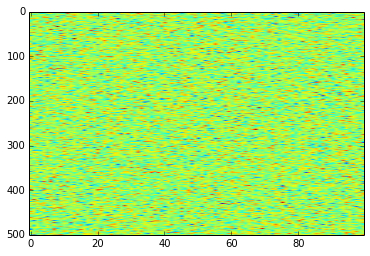

In [18]:
imshow(dm[29::32,:100].real,aspect='auto')

In [10]:
dc = d[:,32:96].mean(1)-d[:,140:204].mean(1)

In [11]:
dc.shape

(16000,)

In [12]:
dc = dc.reshape((-1,32))

/home/local/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


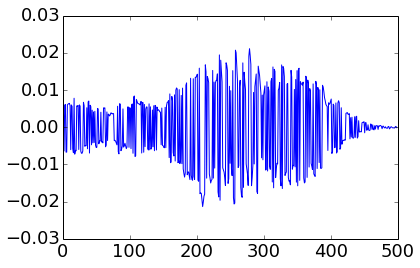

In [13]:
plot(dc[:,30])

In [14]:
mmw = ts.mmw_source_freq[::32]

In [15]:
zbd = ts.zbd_voltage[::32]

In [16]:
tones = 512.*ts.tonebin[:32]/2.**15

In [17]:
tones[tones>256] = tones[tones>256]-512

In [18]:
tones+1230

array([ 1246.203125,  1248.25    ,  1258.8125  ,  1262.703125,
        1265.203125,  1272.296875,  1273.203125,  1274.203125,
        1274.796875,  1291.75    ,  1293.796875,  1301.796875,
        1302.90625 ,  1314.40625 ,  1315.703125,  1320.296875,
        1324.296875,  1126.625   ,  1138.625   ,  1144.5625  ,
        1149.296875,  1151.59375 ,  1156.40625 ,  1162.703125,
        1169.703125,  1172.796875,  1178.40625 ,  1184.5     ,
        1193.796875,  1195.      ,  1203.59375 ,  1208.203125])

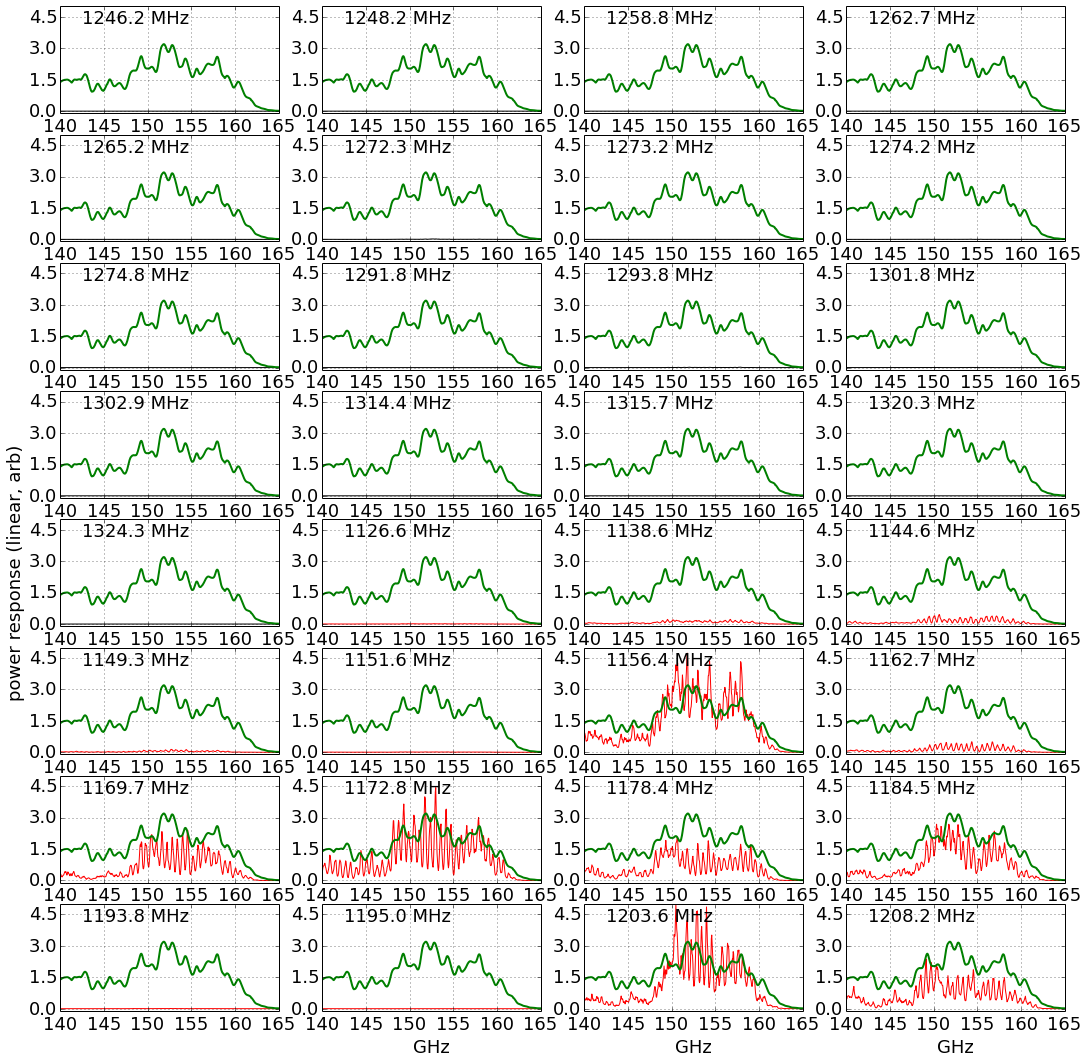

In [32]:
fig,axs = subplots(8,4,figsize=(18,18))
for k in range(32):
    ax = axs.flatten()[k]
    if tones[k] < 0:
        color='r'
    else:
        color='k'
    ax.plot(mmw/1e9,np.abs(dc[:,k])**2*10000,color=color)#+f128[:,k]+f64[:,k]))
    ax.plot(mmw/1e9,zbd*1000,lw=2,color='g')
    ax.set_ylim(-.1,5.)
    ax.grid()
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.text(0.1,0.97,('%.1f MHz' % (tones[k]+1230)),transform=ax.transAxes,ha='left',va='top')
    if k  == 16:
        ax.set_ylabel('power response (linear, arb)')
    if k > 28:
        ax.set_xlabel('GHz')
plt.savefig('/home/gjones/paper_plots/2015-12-01-mmw-response-linear.png',bbox_inches='tight')

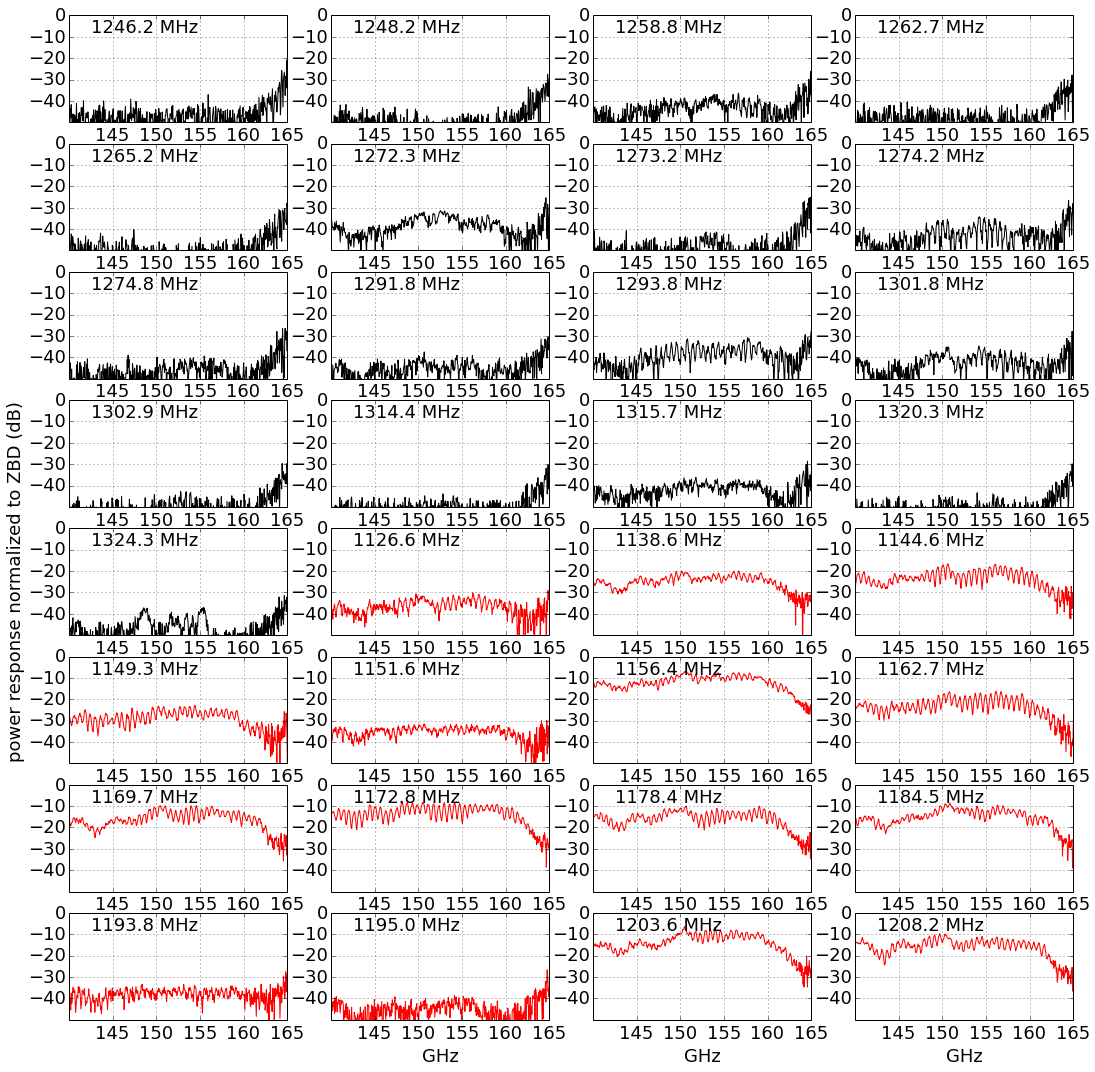

In [33]:
fig,axs = subplots(8,4,figsize=(18,18))
for k in range(32):
    ax = axs.flatten()[k]
    if tones[k] < 0:
        color='r'
    else:
        color='k'
    ax.plot(mmw/1e9,10*np.log10(np.abs(dc[:,k])**2/(zbd)),color=color)
    ax.set_ylim(-50,0)
    ax.grid(True)
    ax.yaxis.get_majorticklabels()[0].set_visible(False)
    ax.xaxis.get_majorticklabels()[0].set_visible(False)
    ax.text(0.1,0.97,('%.1f MHz' % (tones[k]+1230)),transform=ax.transAxes,ha='left',va='top')
    if k  == 16:
        ax.set_ylabel('power response normalized to ZBD (dB)')
    if k > 28:
        ax.set_xlabel('GHz')
plt.savefig('/home/gjones/paper_plots/2015-12-01-mmw-response-log.png',bbox_inches='tight')

In [40]:
155.5/12.

12.958333333333334

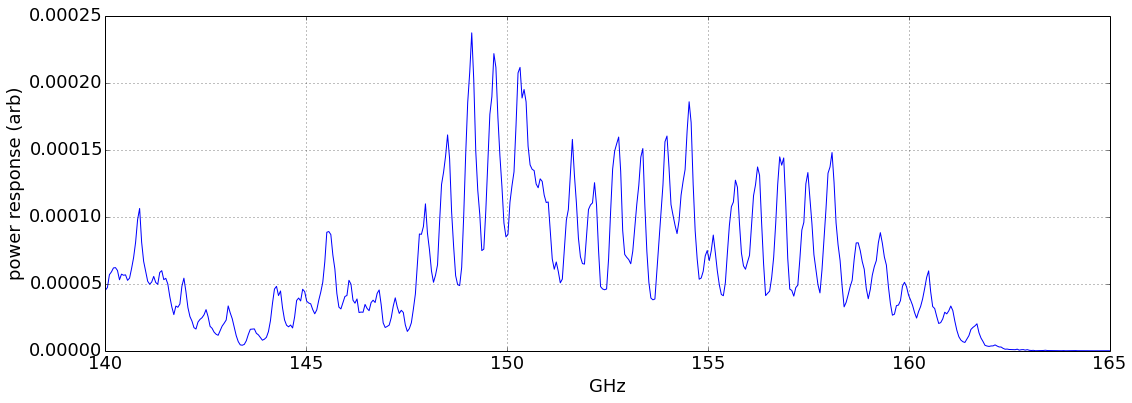

In [35]:
figure(figsize=(18,6))
plot(mmw/1e9,np.abs(dc[:,31])**2)
grid()
ylabel('power response (arb)')
xlabel('GHz')
plt.savefig('/home/gjones/paper_plots/2015-12-01-mmw-response-detector-31-ripple.png',bbox_inches='tight')

In [36]:
swp = rnc.sweeps[0]

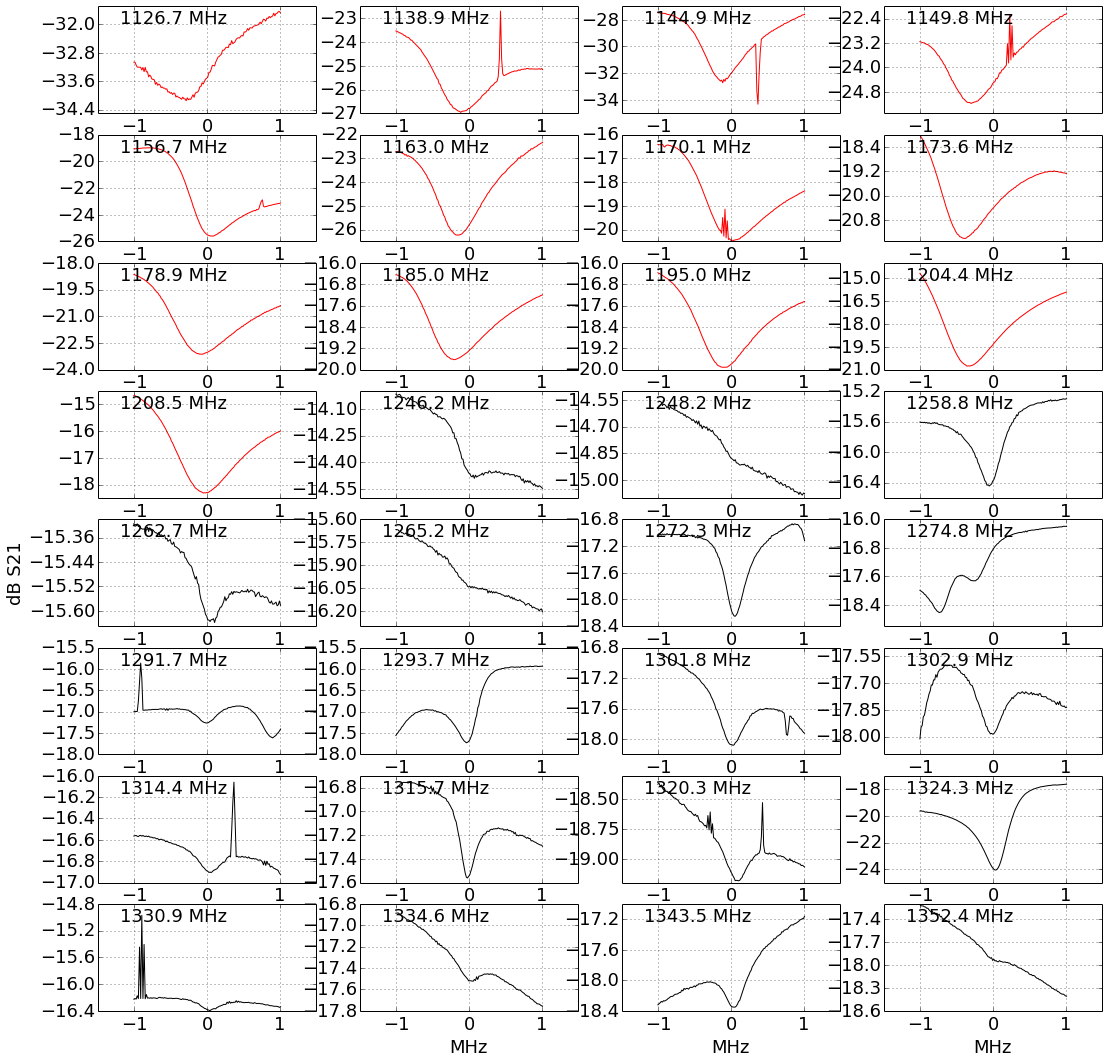

In [43]:
fig,axs = subplots(8,4,figsize=(18,18))
for k in range(32):
    ax = axs.flatten()[k]
    fr,s21,err = swp.select_by_index(k)
    
    if fr.mean() < 1230:
        color='r'
    else:
        color='k'
    dby = 20*np.log10(np.abs(s21))
    ax.plot(fr-fr.mean(),dby,color=color)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
    ax.text(0.1,0.97,('%.1f MHz' % (fr.mean())),transform=ax.transAxes,ha='left',va='top')

    ax.grid()
    if k  == 16:
        ax.set_ylabel('dB S21')
    if k > 28:
        ax.set_xlabel('MHz')    
plt.savefig('/home/gjones/paper_plots/2015-12-01-resonator_frequency_sweeps.png',bbox_inches='tight')

In [33]:
3e8/500e6

0.6

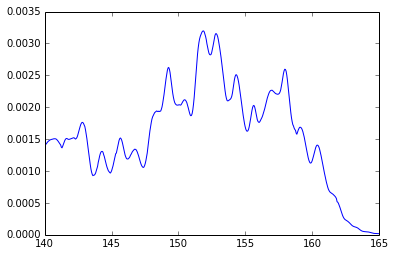

In [17]:
plot(mmw/1e9,zbd)

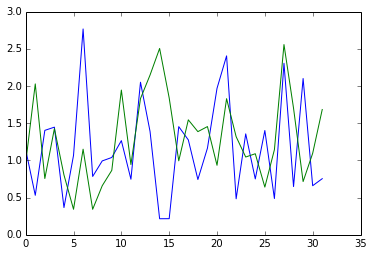

In [9]:
plot(f64[0,:])
plot(f64[20,:])


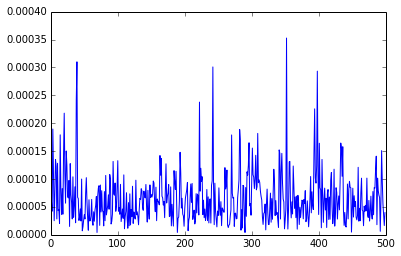

In [28]:
plot(np.abs(dc[:,23]))

In [12]:
1

1